In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# 1. Read the file

In [5]:
#1. بارگذاری داده‌ها
df = pd.read_excel('cleardata.xlsx')

In [6]:
df = df.rename(columns={'managhe_shahrdari': 'region'})

# 2.Exploring the data

In [7]:
df.describe()

,region,masahat,price,age
count,209989.000000,3.318600e+05,3.318590e+05,331860.000000
mean,7.743810,2.204266e+03,3.435901e+04,6.901371
std,5.441857,9.347086e+05,2.255549e+05,8.301445
min,1.000000,1.000000e+00,0.000000e+00,0.000000
25%,4.000000,6.681000e+01,1.362840e+04,1.000000
50%,6.000000,8.450000e+01,2.320000e+04,4.000000
75%,11.000000,1.078000e+02,3.838384e+04,10.000000
max,22.000000,5.300000e+08,7.100000e+07,1309.000000


In [8]:
df.head()

,region,masahat,price,age,eskelet,date,Ostan,Shahrestan
0,NaN,60.00,5000.00,10,felezi,1395/01/01,Tehran,Pakdasht
1,14.0,70.63,35962.06,1,botoni,1395/01/01,Tehran,Tehran
2,NaN,75.00,8000.00,1,botoni,1395/01/01,Kurdistan,turpentine
3,2.0,196.16,173327.90,20,felezi,1395/01/01,Tehran,Tehran
4,NaN,118.00,11101.69,0,botoni,1395/01/01,Alborz,Karaj


In [9]:
# محاسبه کوانتایل‌های ۲۰ و ۸۰ درصد
q_20 = df['price'].quantile(0.2)
q_80 = df['price'].quantile(0.8)

# فیلترینگ بر اساس کوانتایل‌ها
df = df[(df['price'] >= q_20) & (df['price'] <= q_80)]


In [10]:
# price / 10,000
df['price'] = df['price']%10000
df.head(2)

,region,masahat,price,age,eskelet,date,Ostan,Shahrestan
1,14.0,70.63,5962.06,1,botoni,1395/01/01,Tehran,Tehran
5,NaN,145.00,5172.41,5,botoni,1395/01/01,Alborz,Karaj


In [11]:
df['price'] = np.log(df['price'])
df.head(5)

/home/anjel/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,region,masahat,price,age,eskelet,date,Ostan,Shahrestan
1,14.0,70.63,8.693171,1,botoni,1395/01/01,Tehran,Tehran
5,NaN,145.00,8.551094,5,botoni,1395/01/01,Alborz,Karaj
6,1.0,87.00,8.407996,1,botoni,1395/01/01,Tehran,Tehran
7,NaN,107.00,7.673004,5,botoni,1395/01/01,Alborz,Karaj
10,NaN,58.00,7.788953,0,botoni,1395/01/02,Alborz,Karaj


In [12]:
df['price'].isin([-np.inf]).sum()

3292

In [13]:
df = df[~df['price'].isin([-np.inf])]


In [14]:
#check -inf value is clear
df['price'].isin([-np.inf]).sum()

0

In [15]:
#برررسی عدد ۰ و منفی در ستون ها 
count_zero_or_negative1 = (df['masahat'] <= 0).sum()
print(count_zero_or_negative1, 'عدد منفی در  مساحت')

count_zero_or_negative2 = (df['price'] <= 0).sum()
print(count_zero_or_negative2, ' : عدد منفی در  یک متر مربع')

count_zero_or_negative3 = (df['age'] < 0).sum()
print(count_zero_or_negative3, ' : عدد منفی در سن بنا')


0 عدد منفی در  مساحت
2  : عدد منفی در  یک متر مربع
0  : عدد منفی در سن بنا


In [16]:
# value <0 is drop
# حذف سطرهایی که مقدار یکی از ستون‌ها (masahat، gheymat_1_metr_moraba، age_bana) منفی یا صفر باشد
df = df[(df['masahat'] > 0) & (df['price'] > 0) & (df['age'] > 0)]


In [17]:
#برررسی عدد ۰ و منفی در ستون ها 
count_zero_or_negative1 = (df['masahat'] <= 0).sum()
print(count_zero_or_negative1, 'عدد منفی در  مساحت')

count_zero_or_negative2 = (df['price'] <= 0).sum()
print(count_zero_or_negative2, ' قیمت :')

count_zero_or_negative3 = (df['age'] < 0).sum()
print(count_zero_or_negative3, ' : عدد منفی در سن بنا')


0 عدد منفی در  مساحت
0  قیمت :
0  : عدد منفی در سن بنا


In [18]:
df.isnull().sum()

region        57320
masahat           0
price             0
age               0
eskelet           0
date              0
Ostan             0
Shahrestan        0
dtype: int64

In [19]:
df.fillna(0, inplace=True)
df.isnull().sum()


region        0
masahat       0
price         0
age           0
eskelet       0
date          0
Ostan         0
Shahrestan    0
dtype: int64

In [20]:
df.count()

region        168676
masahat       168676
price         168676
age           168676
eskelet       168676
date          168676
Ostan         168676
Shahrestan    168676
dtype: int64

In [21]:
df.head(2)

,region,masahat,price,age,eskelet,date,Ostan,Shahrestan
1,14.0,70.63,8.693171,1,botoni,1395/01/01,Tehran,Tehran
5,0.0,145.00,8.551094,5,botoni,1395/01/01,Alborz,Karaj


In [22]:
df.shape

(168676, 8)

# 3. Finding the exploring the null values

# Convert the Datatype of "date" column to Date-Time format

In [23]:
df.head(2)

,region,masahat,price,age,eskelet,date,Ostan,Shahrestan
1,14.0,70.63,8.693171,1,botoni,1395/01/01,Tehran,Tehran
5,0.0,145.00,8.551094,5,botoni,1395/01/01,Alborz,Karaj


In [24]:
type(df['date'])

pandas.core.series.Series

In [25]:
df.dtypes

region        float64
masahat       float64
price         float64
age             int64
eskelet        object
date           object
Ostan          object
Shahrestan     object
dtype: object

In [26]:
import jdatetime
# تابع تبدیل تاریخ شمسی به میلادی
def jalali_to_gregorian(date_str):
    j_date = jdatetime.date(*map(int, date_str.split('/')))
    g_date = j_date.togregorian()
    return g_date.strftime('%Y-%m-%d')

df['date'] = df['date'].apply(jalali_to_gregorian)


In [27]:
df.date = pd.to_datetime(df.date)

In [28]:
df.head(2)

,region,masahat,price,age,eskelet,date,Ostan,Shahrestan
1,14.0,70.63,8.693171,1,botoni,2016-03-20,Tehran,Tehran
5,0.0,145.00,8.551094,5,botoni,2016-03-20,Alborz,Karaj


In [29]:
df.dtypes

region               float64
masahat              float64
price                float64
age                    int64
eskelet               object
date          datetime64[ns]
Ostan                 object
Shahrestan            object
dtype: object

# Add a new column in the dataframe, which containes years only.

In [30]:
df["year"] = df.date.dt.year
df.head(2)

,region,masahat,price,age,eskelet,date,Ostan,Shahrestan,year
1,14.0,70.63,8.693171,1,botoni,2016-03-20,Tehran,Tehran,2016
5,0.0,145.00,8.551094,5,botoni,2016-03-20,Alborz,Karaj,2016


# Add a new column "month" as the 2nd column in the dataframe

In [31]:
df.insert(1, "month", df.date.dt.month)
df.head(2)

,region,month,masahat,price,age,eskelet,date,Ostan,Shahrestan,year
1,14.0,3,70.63,8.693171,1,botoni,2016-03-20,Tehran,Tehran,2016
5,0.0,3,145.00,8.551094,5,botoni,2016-03-20,Alborz,Karaj,2016


# Remove the columns eyar and month from the dataframe

In [32]:
df.drop(["year", "month"], axis = 1, inplace = True)
df.head(2)


,region,masahat,price,age,eskelet,date,Ostan,Shahrestan
1,14.0,70.63,8.693171,1,botoni,2016-03-20,Tehran,Tehran
5,0.0,145.00,8.551094,5,botoni,2016-03-20,Alborz,Karaj


In [33]:
df["year"] = df.date.dt.year
df.head(2)

,region,masahat,price,age,eskelet,date,Ostan,Shahrestan,year
1,14.0,70.63,8.693171,1,botoni,2016-03-20,Tehran,Tehran,2016
5,0.0,145.00,8.551094,5,botoni,2016-03-20,Alborz,Karaj,2016


In [34]:
dff = df[df.Ostan == "Tehran"]
dff.head(2)


,region,masahat,price,age,eskelet,date,Ostan,Shahrestan,year
1,14.0,70.63,8.693171,1,botoni,2016-03-20,Tehran,Tehran,2016
6,1.0,87.00,8.407996,1,botoni,2016-03-20,Tehran,Tehran,2016


date
1     9.210257
2     9.210111
3     9.209940
4     9.210182
5     9.210120
6     9.210058
7     9.210257
8     9.210111
9     9.210003
10    9.210177
11    9.210157
12    9.209949
Name: price, dtype: float64


<Axes: xlabel='date'>

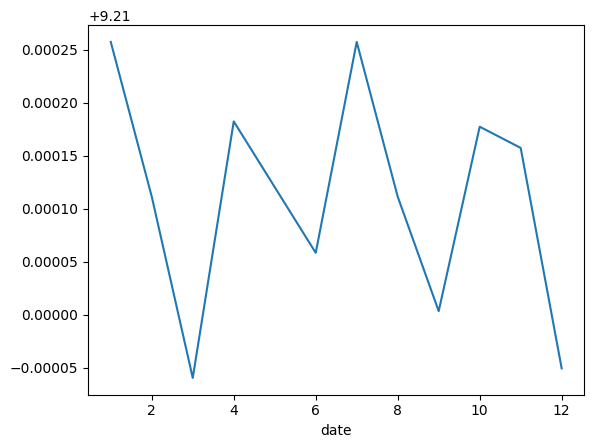

In [35]:
max_price_monthly = dff.groupby([dff['date'].dt.month])['price'].max()
print(max_price_monthly)
max_price_monthly.plot()

یکی از روش‌های معمول برای حذف یک قسمت مشخص از داده‌ها بر اساس مقادیر کوانتایل است. برای حذف ۲۰ درصد مقادیر ماکسیمم و ۲۰ درصد مقادیر مینیمم، می‌توانید از کوانتایل‌های ۲۰ و ۸۰ درصد استفاده کنید.

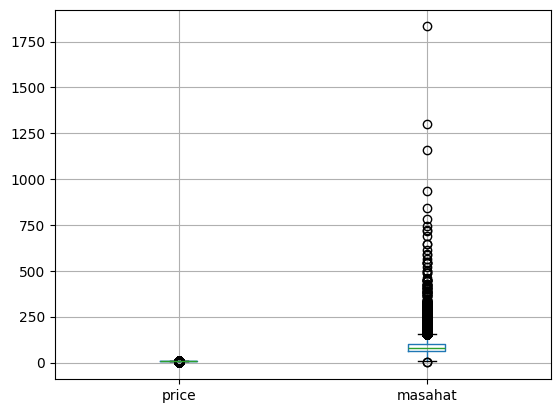

In [37]:

df.boxplot(column=['price', 'masahat'])
plt.show()

In [38]:
# حذف مقادیر ناهنجار
df = df[(df['price'] < df['price'].quantile(0.99)) & (df['price'] > df['price'].quantile(0.01))]
print(df)

# بعد از اجرا مجموعه داده کاهش پیدا می کند

        region  masahat     price  age eskelet       date            Ostan  \
1         14.0    70.63  8.693171    1  botoni 2016-03-20           Tehran   
5          0.0   145.00  8.551094    5  botoni 2016-03-20           Alborz   
6          1.0    87.00  8.407996    1  botoni 2016-03-20           Tehran   
7          0.0   107.00  7.673004    5  botoni 2016-03-20           Alborz   
11         0.0    90.00  7.654969    2  botoni 2016-03-21  East Azarbaijan   
...        ...      ...       ...  ...     ...        ...              ...   
331852     0.0    99.00  8.432933    5  botoni 2017-03-20          Bushehr   
331853    10.0    93.00  8.143477    1  botoni 2017-03-20           Alborz   
331855     4.0    65.00  7.600902    3  botoni 2017-03-20           Tehran   
331856     3.0   120.00  9.150237    1  botoni 2017-03-20           Alborz   
331857     1.0    91.94  8.276051    1  botoni 2017-03-20          Esfahan   

          Shahrestan  year  
1             Tehran  2016  
5    

In [40]:
df.describe()

,region,masahat,price,age,date,year
count,165301.000000,165301.000000,165301.000000,165301.000000,165301,165301.000000
mean,6.200543,84.590580,8.261157,8.272188,2016-09-16 05:40:15.469960960,2016.226629
min,0.000000,1.000000,4.846468,1.000000,2016-03-20 00:00:00,2016.000000
25%,0.000000,62.330000,7.856761,2.000000,2016-06-16 00:00:00,2016.000000
50%,4.000000,78.620000,8.478001,6.000000,2016-09-03 00:00:00,2016.000000
75%,11.000000,100.000000,8.885940,13.000000,2016-12-23 00:00:00,2016.000000
max,22.000000,1832.000000,9.199554,1309.000000,2017-03-20 00:00:00,2017.000000
std,6.399697,32.724688,0.812100,8.466512,NaN,0.418652


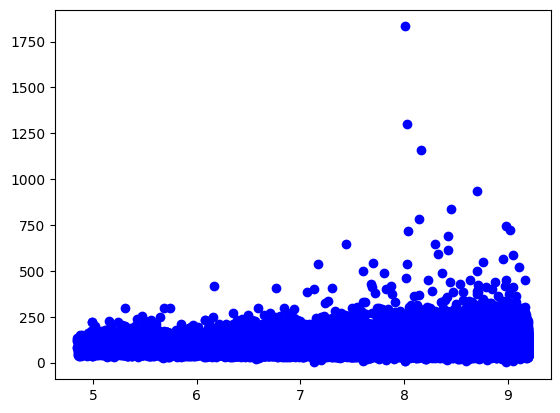

In [41]:
plt.scatter(df['price'], df['masahat'], color='blue', marker='o', label='Data Points')  # رسم نمودار پراکندگی
plt.show()

In [42]:
df.count()

region        165301
masahat       165301
price         165301
age           165301
eskelet       165301
date          165301
Ostan         165301
Shahrestan    165301
year          165301
dtype: int64

In [44]:
# 6. نرمال‌سازی یا استانداردسازی داده‌ها
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['masahat', 'price']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# در این کد، از StandardScaler برای استانداردسازی داده‌های عددی استفاده می‌شود. این فرایند باعث می‌شود که هر ویژگی عددی دارای میانگین ۰ و واریانس ۱ شود. استانداردسازی به خصوص برای الگوریتم‌های یادگیری ماشین که از فاصله‌های اقلیدسی استفاده می‌کنند (مانند رگرسیون خطی، SVM، و شبکه‌های عصبی) مفید است.

In [45]:
# check normalization
df.describe()

,region,masahat,price,age,date,year
count,165301.000000,1.653010e+05,1.653010e+05,165301.000000,165301,165301.000000
mean,6.200543,3.184313e-16,1.676707e-15,8.272188,2016-09-16 05:40:15.469960960,2016.226629
min,0.000000,-2.554366e+00,-4.204778e+00,1.000000,2016-03-20 00:00:00,2016.000000
25%,0.000000,-6.802402e-01,-4.979646e-01,2.000000,2016-06-16 00:00:00,2016.000000
50%,4.000000,-1.824494e-01,2.670180e-01,6.000000,2016-09-03 00:00:00,2016.000000
75%,11.000000,4.708820e-01,7.693461e-01,13.000000,2016-12-23 00:00:00,2016.000000
max,22.000000,5.339744e+01,1.155524e+00,1309.000000,2017-03-20 00:00:00,2017.000000
std,6.399697,1.000003e+00,1.000003e+00,8.466512,NaN,0.418652


In [47]:
# یافتن رکوردهای تکراری:
duplicates = df.duplicated().sum()  
print(f"DUPLICATES: {duplicates}")

DUPLICATES: 898


In [48]:

# Continuous variables
cont_feat = df.columns.where(df.dtypes == np.float64).dropna().tolist()
cont_feat

['region', 'masahat', 'price']

In [49]:
skewness = pd.DataFrame(data=df[cont_feat].skew().values, index=cont_feat)
skewness.rename({0: 'skewness'}, axis=1)

,skewness
region,0.715353
masahat,3.529102
price,-1.355036


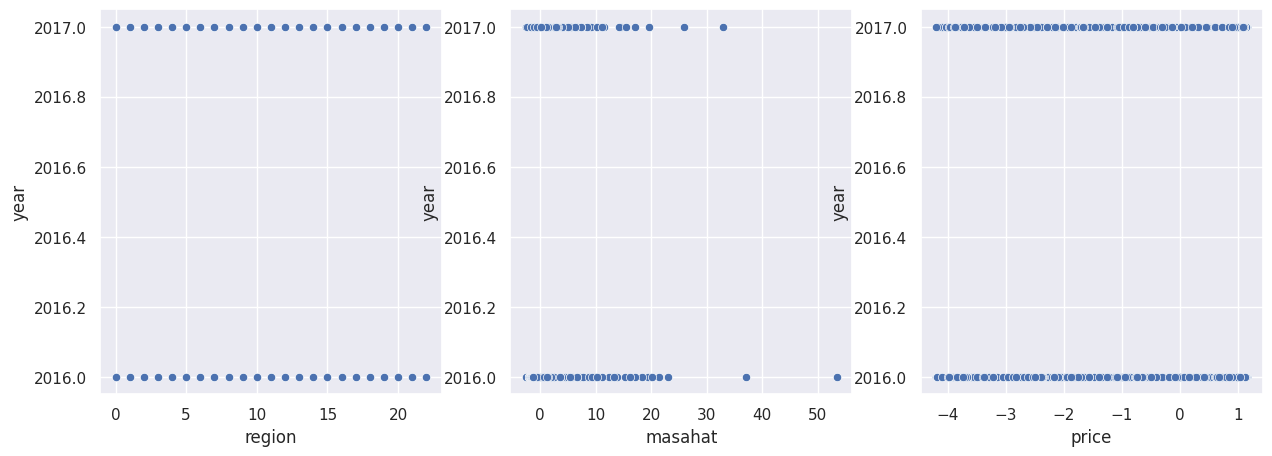

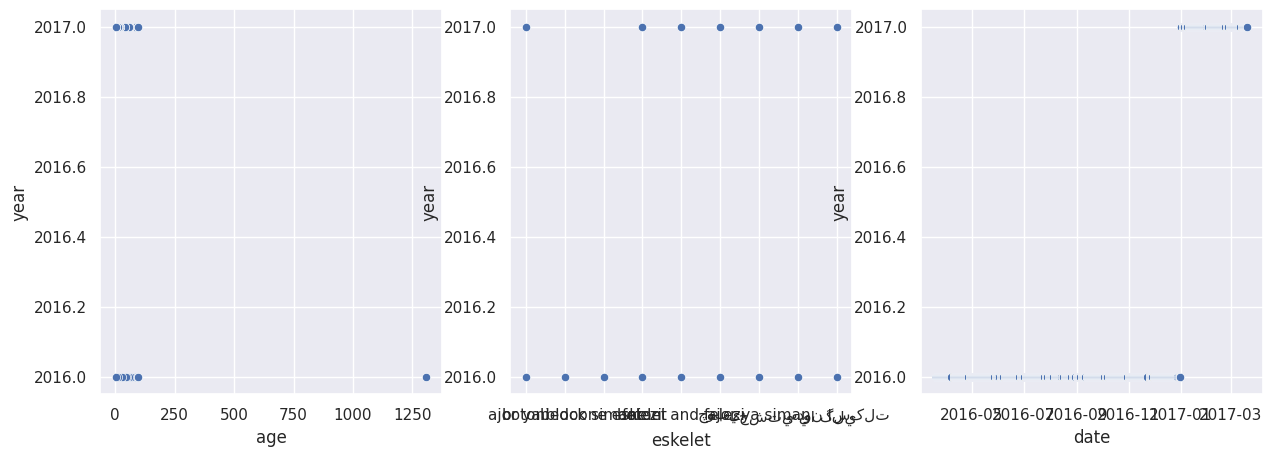

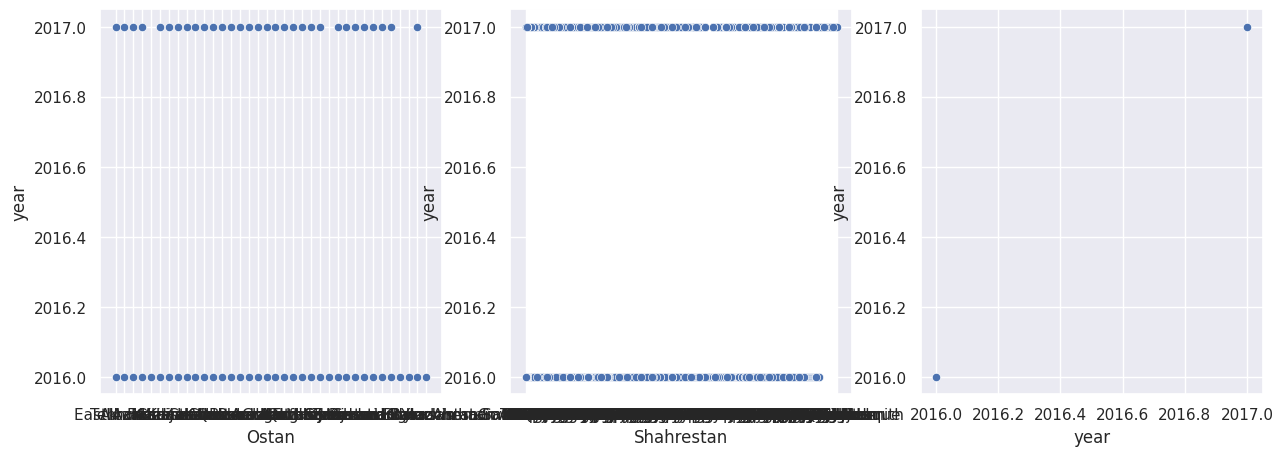

In [51]:
features = df.columns.tolist()

# plot the feature variables against the median_val
sns.set_theme(style="darkgrid")
for feat in range(0, len(features) - 2, 3):
    sns.color_palette("hls", 8)
    _, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    sns.scatterplot(x=df.iloc[:,feat],     y=df.iloc[:,-1], ax=ax[0])
    sns.scatterplot(x=df.iloc[:,feat + 1], y=df.iloc[:,-1], ax=ax[1])
    sns.scatterplot(x=df.iloc[:,feat + 2], y=df.iloc[:,-1], ax=ax[2])

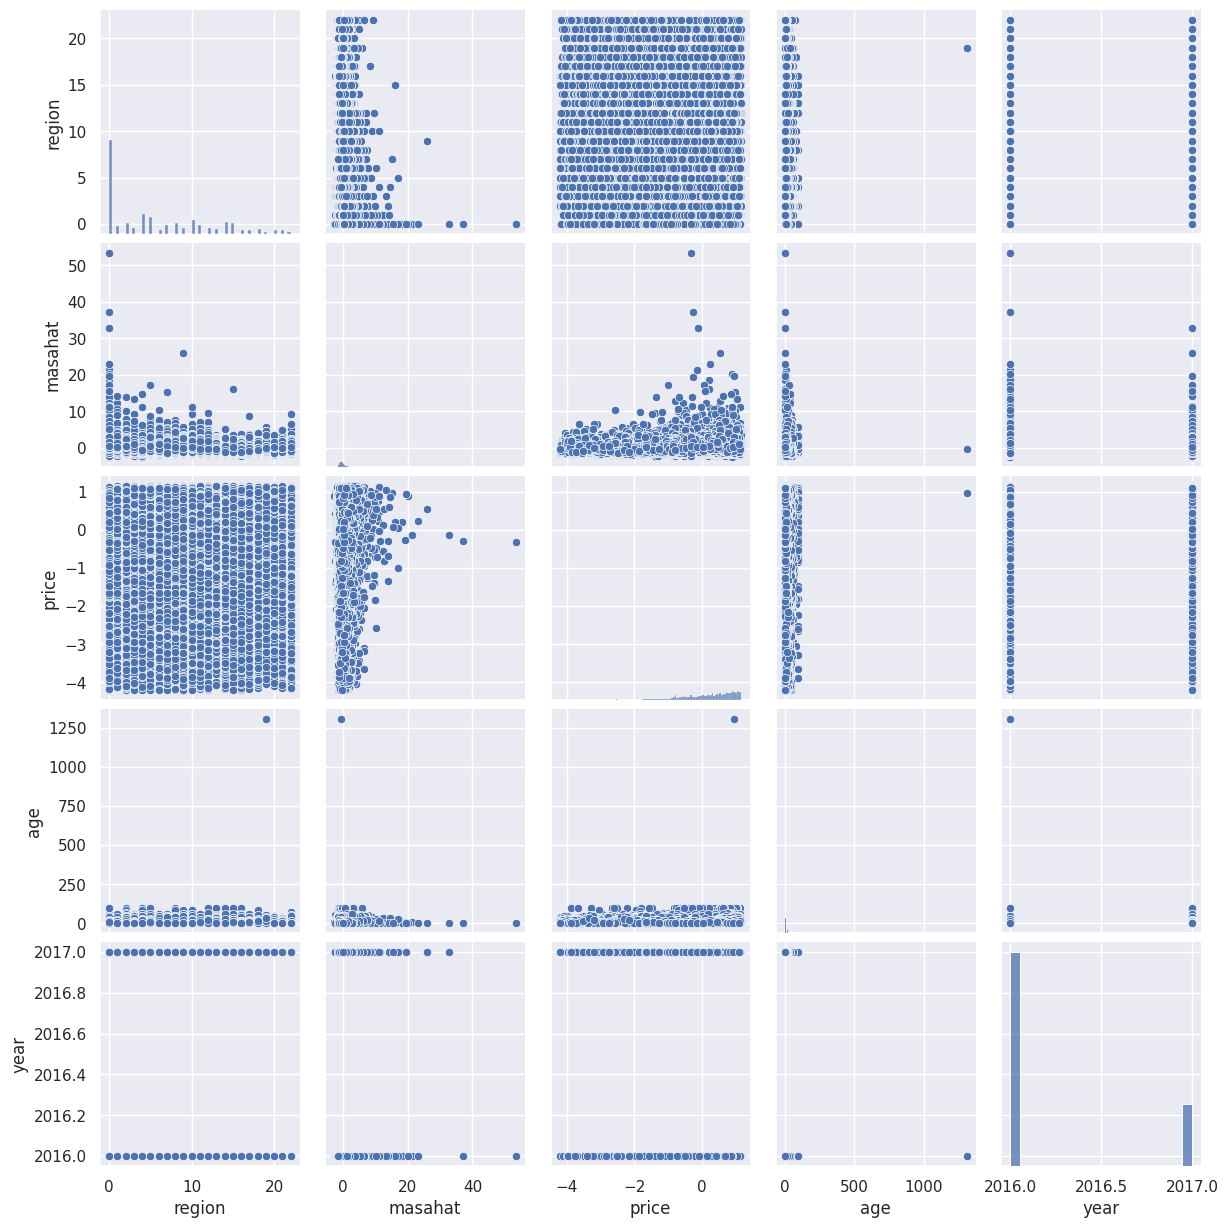

In [52]:
sns.pairplot(df)
plt.show()